# 01 Differential Geometry for Engineers

## C) Riemannian Metrics

$\color{#003660}{\text{Nina Miolane - Assistant Professor}}$ @ BioShape Lab @ UCSB ECE
- Texts and illustrations by [Adele Myers](https://ahma2017.wixsite.com/adelemyers) @ BioShape Lab.
- Textbook: Guigui, Miolane, Pennec, 2022. Introduction to Riemannian Geometry and Geometric Statistics.

<center><img src="figs/01_geod_sphere.png" width=400px alt="default"/></center>

<center><img src="figs/01_geod.png" width=400px alt="default"/></center>

# This Lecture

# Outline

- **Unit 1 (Geometry - Math!)**: Differential Geometry for Engineers
  - A) Manifolds
    - Our data spaces.
    - Example: a space of shapes.
  - C) Lie groups
    - Group of transformations that deform our data.
    - Example: the group of rotations.
  - **B) Riemannian Metrics**
    - Tools we use to compute on these spaces.
    - Example: helps computing a distance between two shapes.
    
<center><img src="figs/01_tools.jpeg" width=400px alt="default"/></center>


# Motivation: Elementary Operations in ML

Machine Learning (ML) relies on fundamental operations from linear algebra, i.e. operations on vector spaces.
- $\color{#EF5645}{\text{Addition}}$: adding a vector to a point to get a point
  - $\color{#047C91}{\text{Example}}$: Gradient ascent: $x_{k+1} = x_k + \nabla_x f(x)$ -- to maximize an objective $f$ with respect to parameters $x$.
- $\color{#EF5645}{\text{Subtraction}}$: subtracting two points to get a vector
  - $\color{#047C91}{\text{Example}}$: Rate of change of the parameter: $x_{k+1} - x_k$ 

<center><img src="figs/01_gd.png" width=500px alt="default"/></center>


- $\color{#EF5645}{\text{Distance}}$: Computing the distance between two points
  - $\color{#047C91}{\text{Example}}$: In $K$-nearest neighbors, need a notion of distance to find which points are the "nearest neighbors".
  
<center><img src="figs/01_knn.png" width=400px alt="default"/></center>

- $\color{#EF5645}{\text{Straight Line}}$: Computing the line joining two points, i.e. the curve of shortest length.
  - $\color{#047C91}{\text{Example}}$: In linear regression, we fit a line to the data points.
  
<center><img src="figs/01_lr.png" width=400px alt="default"/></center>

Generalizing Machine Learning (ML) to manifolds starts with generalizing the elementary operations:

- $\color{#EF5645}{\text{Addition}}$: add a vector to a point ot get a point --> $\color{#047C91}{\text{Exponential}}$
- $\color{#EF5645}{\text{Subtraction}}$: subtract two points to get a vector --> $\color{#047C91}{\text{Logarithm}}$
- $\color{#EF5645}{\text{Distance}}$: compute distance between two points --> $\color{#047C91}{\text{Geodesic Distance}}$
- $\color{#EF5645}{\text{Straight Line}}$: computing the curve of shortest length between two points --> $\color{#047C91}{\text{Geodesic}}$


# Outline

You will learn:

1. **What is a Riemannian metric?**
2. From straight lines to geodesics
3. From addition/subtraction to exponential/logarithm map
4. From euclidean distance to Riemannian distance

### 1. What is a Riemannian metric?

$\color{#EF5645}{\text{Intuition}}$: A Riemannian metric is denoted $<,>$ or $g$ and:
- gives you the inner-product $<u,v>_p$ between two tangent vector $u$ and $v$ at the same tangent space $T_pM$,
- which means that it gives you the angle between two vectors, but also the norm of a vector.

<center><img src="figs/02_tangentspace.jpg" width=450px alt="default"/></center>

### Riemannian metric: Mathematical definition

$\color{#EF5645}{\text{Definition}}$: A Riemannian metric on $M$ is a family $\left(\langle\cdot, \cdot\rangle_{p}\right)_{p \in M}$ of inner products on each tangent space $T_{p} M$, such that $\langle\cdot, \cdot\rangle_{p}$ depends smoothly on $p$. A pair $(M,\langle\cdot, \cdot\rangle)$ is called a Riemannian manifold.

$\color{#EF5645}{\text{Remark}}$: A metric is also written $g=\left(g_{p}\right)_{p \in M}$, where $g_{p}$ is the symmetric positive definite (SPD) matrix representing the inner-product:
$$
g_{i j}(p)=\left\langle\left(e_i\right)_{p},\left(e_j\right)_{p}\right\rangle_{p}
$$

<center><img src="figs/02_tangentspace.jpg" width=350px alt="default"/></center>

### Levi-Civita Connection

$\color{#EF5645}{\text{"Theorem"}}$: A Riemannian metric gives us a unique "special" connection called the Levi-Civita connection and given by the "Koszul formula"


$$
\Gamma_{i j}^{k}=\frac{1}{2} \sum_{l=1}^dg^{-1}_{l k}\left(\partial_{i} g_{j l}+\partial_{j} g_{l i}-\partial_{l} g_{i j}\right).
$$

$\color{#EF5645}{\text{Remark}}$: Thus, every Riemannian metric gives us all the tools of the connection (exp, log, geodesics) and more!

<center><img src="figs/01_connection.png" width=700px alt="default"/></center>

# Outline

You will learn:

1. What is a Riemannian metric?
2. From straight lines to geodesics
3. From addition/subtraction to exponential/logarithm map
4. From euclidean distance to Riemannian distance

### From Straight Line to Geodesic


$\color{#EF5645}{\text{Intuition}}$: The generalization of the straight line for manifolds is called the geodesic.

We can use the `geodesic` method from the `sphere`. Note the fact that we use the `metric` attribute of the sphere.

In [ ]:
import numpy as np
from geomstats.geometry.hypersphere import Hypersphere

sphere = Hypersphere(dim=2)

point = np.array([-0.65726771, -0.02678122, 0.7531812])
vector = np.array([1, 0, 0.8])
tangent_vector = sphere.to_tangent(vector, base_point=point)

result = sphere.metric.geodesic(initial_tangent_vec=tangent_vector, initial_point=point)
points_on_geodesic = result(np.linspace(0.0, 1.0, 30))

In [ ]:
fig = plt.figure(figsize=(10, 10)); ax = fig.add_subplot(111, projection="3d")

ax = viz.plot(point, ax=ax, space="S2", s=100, alpha=0.8, label="Initial Point")
arrow = viz.Arrow3D(point, vector=tangent_vector); arrow.draw(ax, color="C0", label="Initial Vector")
ax = viz.plot(points_on_geodesic, ax=ax, space="S2", color="black", label="Geodesic")

ax.legend();

## Geodesic on a more complicated manifold

The same syntax allows us to compute the geodesic between two bone cancer cell shapes.

In [ ]:
from geomstats.geometry.discrete_curves import R2, DiscreteCurves, SRVMetric
import geomstats.datasets.utils as data_utils

cells, _, _ = data_utils.load_cells()
curve_space = DiscreteCurves(R2); metric = curve_space.square_root_velocity_metric
cell1 = cells[69] - np.mean(cells[69], axis=0); cell2 = cells[76] - np.mean(cells[76], axis=0)
geodesic = metric.geodesic(initial_curve=cell1, end_curve=cell2)

n_times = 80; times = np.linspace(0.0, 1.0, n_times); geod_points = geodesic(times)

In [ ]:
plt.figure(figsize=(10, 10))
for i in range(1, n_times - 1):
    plt.plot(geod_points[i, :, 0], geod_points[i, :, 1], "o-", color="lightgrey")
plt.plot(geod_points[0, :, 0], geod_points[0, :, 1], "o-b", label="Start Cell")
plt.plot(geod_points[-1, :, 0], geod_points[-1, :, 1], "o-r", label="End Cell")

plt.title("Geodesic between two cell shapes", fontsize=20); plt.legend();

### Geodesics: Mathematical Definition

$\color{#EF5645}{\text{Mathematical Definition:}}$ Consider $M$ a manifold with a connection $\nabla$. A curve $\gamma:[t_0, t_1] \rightarrow M$ is a geodesic of $(M, \nabla)$ if it is "auto-parallel", i.e. for all $t \in[t_0, t_1]$
$$
\nabla_{\dot{\gamma(t)}} \dot{\gamma}(t)=0 \text{ for all $t \in [t_0, t_1]$.}
$$
The equation above is called the geodesic equation, and can be written using the coordinates of the connexion, i.e. the Christoffel symbols:
$$
\ddot{\gamma}^{k}(t)+\Gamma_{i j}^{k} \dot{\gamma}^{i}(t) \dot{\gamma}^{j}(t)=0 .
$$

$\color{#EF5645}{\text{Explanation:}}$ The tangent vector to the curve $\gamma$ stays parallel (to itself) when transported along the curve. The geodesics are the generalizations of the straight lines in a vector space.

$\color{#EF5645}{\text{Remark:}}$ $\nabla_{\dot{\gamma}} \dot{\gamma}$ can be interpreted as the covariant acceleration of $\gamma$: geodesics are curves with zero acceleration.


- Geodesics and trajectories of shapes

<center><img src="figs/01_brain_trajectories.png" width=400px alt="default"/></center>

- ... specifically the acceleration of shape changes in Alzheimer's disease.

### Remark on Geodesics

$\color{#EF5645}{\text{"Theorem"}}$: The geodesics given by the Levi-Civita connection are the distance-minimizing curves. It says that the "straight" curves are the curves minimizing the distance it takes to go from one point to another.

# Outline

You will learn:

1. What is a Riemannian metric?
2. From straight lines to geodesics
3. From addition/subtraction to exponential/logarithm map
4. From euclidean distance to Riemannian distance

### From Addition to Exponential Map

$\color{#EF5645}{\text{Intuition}}$: The generalization of the addition for manifolds is called the exponential. Note that it is (in general) different from the exponential function.

We can use the `exp` method from the `sphere`. Note the fact that we use the `metric` attribute of the sphere.

In [1]:
import numpy as np
from geomstats.geometry.hypersphere import Hypersphere

sphere = Hypersphere(dim=2)

point = np.array([-0.65726771, -0.02678122, 0.7531812])
vector = np.array([1, 0, 0.8])
tangent_vector = sphere.to_tangent(vector, base_point=point)

result = sphere.metric.exp(tangent_vector, base_point=point)

INFO: Using numpy backend


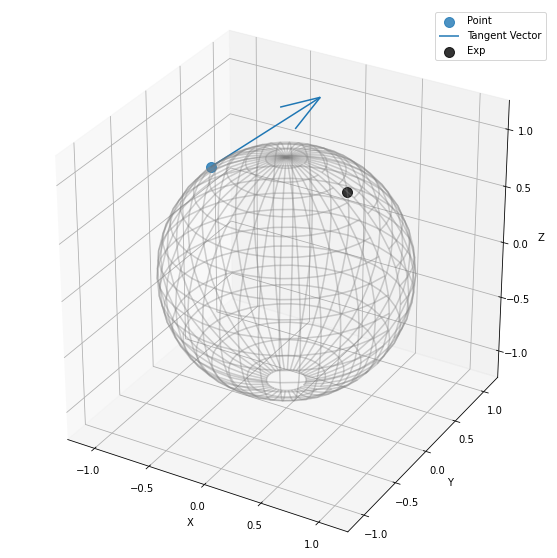

In [2]:
import matplotlib.pyplot as plt
import geomstats.visualization as viz

fig = plt.figure(figsize=(10, 10)); ax = fig.add_subplot(111, projection="3d")

ax = viz.plot(point, ax=ax, space="S2", s=100, alpha=0.8, label="Point")
arrow = viz.Arrow3D(point, vector=tangent_vector); arrow.draw(ax, color="C0", label="Tangent Vector")
ax = viz.plot(result, ax=ax, space="S2", s=100, alpha=0.8, label="Exp", color="black")
ax.legend();

### Exponential Map: Mathematical Definition

$\color{#EF5645}{\text{Mathematical Definition}}$: Consider a manifold $M$ with a connection $\nabla$. The $\operatorname{map}$ that "shoots" from a point $x$ with a tangent vector $v$ using the geodesic $\gamma$
$$(x, v) \mapsto \operatorname{Exp}_{x}(u) = \gamma_{x, v}(1)$$ 

is called the exponential map of $\nabla$.

$\color{#EF5645}{\text{Explanation}}$: This is the generalization of the addition of a vector to a point in a vector space.



### From Subtraction to Logarithm

$\color{#EF5645}{\text{Intuition}}$: The generalization of the subtraction for manifolds is called the logarithm. Note that it is (in general) different from the logarithm function.

We can use the `log` method from the `sphere`. Note the fact that we use the `metric` attribute of the sphere.

In [3]:
import numpy as np
from geomstats.geometry.hypersphere import Hypersphere

sphere = Hypersphere(dim=2)

point1 = np.array([-0.48202861, 0.61760022, 0.62146471])
point2 = np.array([0.50862172, -0.25293377, -0.82299967])

result = sphere.metric.log(point2, base_point=point1)

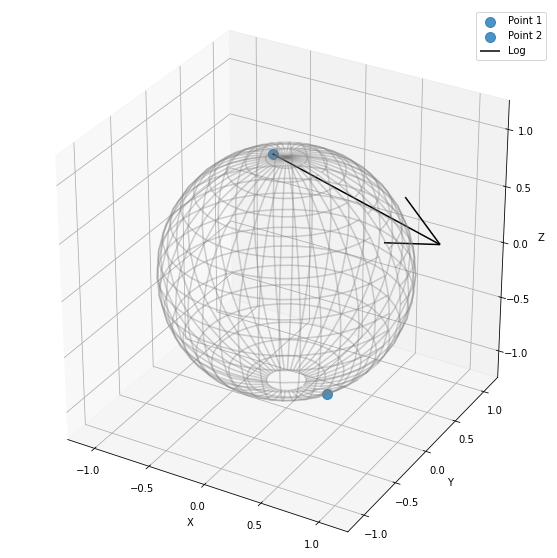

In [4]:
import matplotlib.pyplot as plt
import geomstats.visualization as viz

fig = plt.figure(figsize=(10, 10)); ax = fig.add_subplot(111, projection="3d")

ax = viz.plot(point1, ax=ax, space="S2", s=100, alpha=0.8, label="Point 1", c="C0")
ax = viz.plot(point2, ax=ax, space="S2", s=100, alpha=0.8, label="Point 2", c="C0")
arrow = viz.Arrow3D(point1, vector=result); arrow.draw(ax, color="black", label="Log")
ax.legend();

# Logarithm Map

$\color{#EF5645}{\text{Definition}}$: The logarithm map is the inverse of the exponential map, whenever an inverse exists (see details in textbook). Given two points on the manifold $x_1$ and $x_2$, the logarithm map of $x_2$ at $x_1$ gives us the tangent vector that we should use to reach $x_2$ from $x_1$.

$\color{#EF5645}{\text{Explanation}}$: It is the generalization to manifolds of the subtraction of two vectors.

# Outline

You will learn:

1. What is a Riemannian metric?
2. From straight lines to geodesics
3. From addition/subtraction to exponential/logarithm map
4. From euclidean distance to Riemannian distance

### From Euclidean distance  to  Riemannian distance

$\color{#EF5645}{\text{Length of a curve:}}$ We define the length of the curve $\gamma:[a, b] \rightarrow M$ by:
$$
L(\gamma)=\int_{a}^{b}\|\dot{\gamma}(t)\|_{\gamma(t)} d t
$$


$\color{#EF5645}{\text{Distance between points:}}$ Roughly, the distance between $x$ and $y$ is the length of the shortest curve joining $x$ to $y$ :
$$
d(x, y)=\inf \left\{L(\gamma) \mid \gamma: [0, 1] \rightarrow M , \gamma(0)=x, \gamma(1)=y\right\}.
$$

<center><img src="figs/01_tools.jpeg" width=400px alt="default"/></center>


$\color{#047C91}{\text{Example}}$: Use of Riemanian metric to measure distances between brain connectomes.

1 0


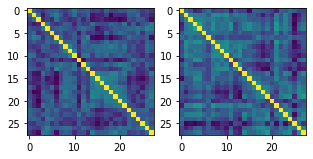

In [13]:
import matplotlib.pyplot as plt
import geomstats.datasets.utils as data_utils

connectomes, patient_id, label = data_utils.load_connectomes()
fig = plt.figure(figsize=(5, 8))
ax = fig.add_subplot(121); imgplot = ax.imshow(connectomes[0])
ax = fig.add_subplot(122); imgplot = ax.imshow(connectomes[1])
print(label[0], label[1])

In [14]:
from geomstats.geometry.spd_matrices import SPDMatrices

conn0 = connectomes[0]; print(conn0.shape)
spd = SPDMatrices(n=28)
print(f"Connectome 0 belongs to this manifold: {spd.belongs(conn0)}")

metric = spd.metric

metric.dist(conn0, connectomes[2])

(28, 28)
Connectome 0 belongs to this manifold: True


3.314966732630055

### Take-Aways

# 7. Visualization on Manifolds

Overview of your homework: see [guidelines](https://github.com/bioshape-lab/ece594n/blob/main/geomviz/README.md).